# Sampling & Sample Size - Week 6


## What we're covering
* #### A couple notes on sampling and sample size determination in industry
* #### A quick look at standard notation and formulas for week 6
* #### A conceptual overview of using the normal curve to find Z-score multipliers required for the formulas of week 6
* #### Using python to find the Z-score multipliers and alpha values
* #### Practice question we'll work through together related to this week's material



## Notes on random sampling and sample size determination



* #### in SQL:  "Select * from [table]" is not a random sample!
* #### You can perform random sampling in SQL, Python, but also Hive, Pyspark, etc.  you'll just need to google the correct syntax for the program you're using
* #### Times that I've used random sampling (besides the obvious testing/training sets)
        1. Appending 3rd party data -- building a model and want to leverage demographic data.
        2. Pulling test and control populations for a test (and this has sometimes required stratified sampling)
        - So it's not that in these cases I didn't have all the data, it's that I didn't NEED all of the data.
        
        

* #### A promise:  Required sample size needed for a test will be a popular question in your data career.
        1. ex: We're running a test on the website to see if conversion is higher for people offered a discount.  
        How long will we need to run this test to get significance at the 95% confidence level?   
        - We haven't covered testing in this course yet, however sample size determination in this context is a constant question in business.

* #### Don't forget to watch David's assignment webinar for help with the assignment questions :)






## Review of notation

* ### $\bar{x}$ - Sample mean
* ### $\mu$ - Population mean

* ### $s$ - Sample standard deviation
* ### $\sigma$ - Population standard deviation

* ### $s^2$ - Sample variance
* ### $\sigma^2$ - Population variance

* ### $n$ - Sample size
* ### $\alpha$ - Significance level, area in the tails.
* ### $Z_{\alpha/2}$ - alpha level Z-Score for a two-tailed test
* ### $n = Z_{\alpha/2} (\frac{\sigma}{error})^2$  - Calculating sample size




* ### $\hat{p}$ - sample proportion
* ### $\hat{p} \sim N(\hat{p},\frac{\hat{p}(1-\hat{p})}{n})$

* ### $\hat{p} \pm Z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ - Calculating upper and lower bound for a proportion
* ### $\bar{x} \pm Z_{\alpha/2} \frac{s}{\sqrt{n}}$ - Calculating upper and lower bound for a Normal distribution




# Conceptual Review

## Normal Distribution is symmetric.  When we talk about 95% confidence we're often referring to a scenario where we care about both tails.



<img src="z of 196.png">

<img src="z of negative 196.png">

<img src="95 confidence.png">

# For the Normal Distribution:
* ### We expect 68.2% of observations to be within 1 standard deviation.
* ### We expect 95.4% of observations to be within 2 standard deviations.
* ### We expect 99.6% of observations to be within 3 standard deviations.

# Finding p-values and multipliers

In [1]:
import scipy.stats as sc

### Get the Z-Score for alpha = 0.05, with area split between two tails of the curve

sc.norm.ppf(.975)

1.959963984540054

In [3]:
### Find alpha for a given the Z-score for only one tail of the normal distribution

sc.norm.cdf(-1.96)

0.024997895148220435

In [4]:
### Find alpha for a given the Z-score for a two-tailed test

2*(1 - sc.norm.cdf(1.96))

0.04999579029644097

In [5]:
###  An alternate way to calcualte alpha, similar to above

sc.norm.cdf(-1.96) + (1 - sc.norm.cdf(1.96))

0.04999579029644092

## Practice 1

##### What is the sample size required when you want to be able to detect the true conversion rate of a website within 0.5%


In [6]:
import numpy as np
import scipy.stats as sc
import math 
p = .2
population_standard_dev = (p*(1-p))**.5
Z_alpha_2 = sc.norm.ppf(.975)

n = (Z_alpha_2**2)*(population_standard_dev/.005)**2

print(n)

###  We need to round up in these scenarios

print(np.ceil(n))


24585.336452442403
24586.0


## Practice 2
##### Now we'll look at data from a black friday sale.  
##### How would we estimate the standard deviation knowing only the min and max of the purchase prices?



In [7]:
### Let's first bring in the dataset.
import pandas as pd

blackfriday = pd.read_csv('blackfriday.csv')

blackfriday.head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00085442      F   0-17          10             A   
1  1000018   P0094142      F  18-25           3             B   
2  1000023  P00112342      M  36-45           0             B   
3  1000028  P00084442      F  26-35           1             C   
4  1000033  P00219242      M  46-50           3             A   
5  1000060  P00132042      M  51-55           1             C   
6  1000097  P00089042      F  36-45           3             C   
7  1000102  P00084642      M  36-45          19             C   
8  1000107   P0097142      M  46-50          18             C   
9  1000139  P00227542      F  26-35          20             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                  12   
1                          3               0                   4   
2                          3               1                  13   
3                          2               1                  13   
4                          1               1                   4   
5                          1               1                  13   
6                          3               0                  13   
7                          3               0                  13   
8                         4+               0                  12   
9                          2               0                  13   

   Product_Category_2  Product_Category_3  Purchase  
0                14.0                 NaN    419.48  
1                 5.0                 NaN    485.49  
2                16.0                 NaN    285.09  
3                16.0                 NaN    420.21  
4                 5.0                 NaN    668.97  
5                16.0                 NaN    564.00  
6                 NaN                 NaN    468.72  
7                16.0                 NaN    619.98  
8                 NaN                 NaN    632.29  
9                 NaN                 NaN    609.90

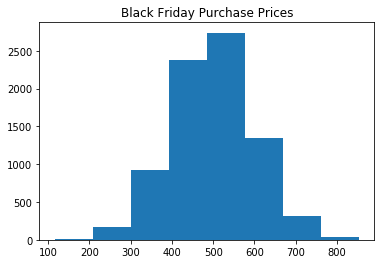

In [20]:
### Let's look at a plot

import matplotlib.pyplot as plt

plt.hist(blackfriday['Purchase'], bins=8)  # arguments are passed to np.histogram
plt.title("Black Friday Purchase Prices")
plt.show()


In [9]:
import numpy as np

### Let's say we only had the min price and the max price.  What would we estimate the standard deviation to be?  
print("min:", np.min(blackfriday['Purchase']))
print("max:", np.max(blackfriday['Purchase']))

estimated_std = (np.max(blackfriday['Purchase']) - np.min(blackfriday['Purchase']))/6
print("Estimated sample sd:", estimated_std)

min: 116.1
max: 853.45
Estimated sample sd: 122.89166666666667


## Practice 3
###  What is the length of the interval +/- 3 estimated standard deviations about the mean?

In [10]:

import numpy as np

mean = np.mean(blackfriday['Purchase'])
upper_bound = mean + 3*estimated_std
lower_bound = mean - 3*estimated_std
interval_length = upper_bound - lower_bound

print("upper bound:", upper_bound )
print("lower bound:", lower_bound )
print("interal length:", interval_length)


upper bound: 867.9726218742101
lower bound: 130.6226218742101
interal length: 737.3499999999999


## Practice 4
### If the data was not normally distributed, what proportion of purchases would we expect to be in the above range?
###  Chebyshev's inquality says we should contain what proportion of the purchases in this range? Then find the proportion of purchases within 3 estimated standard deviations.

In [16]:
###  Data does not need to be normally distributed for Chebyshev's inequality to hold

k = 2
cheby_prop = 1 - 1/(k**2)
print(cheby_prop)

0.75


In [12]:
###  We will have much higher than 88% because our data is normally distributed.  We expect to see 99.6% of observations (based on bullets from conceptual overview)

total_pop = blackfriday['Purchase'].count()


numerator = 0
for index, row in blackfriday.iterrows():
    if lower_bound <= row['Purchase'] <= upper_bound:
        numerator = numerator + 1
    else: pass
    
print("numerator:", numerator)
print("total population:", total_pop)
print("proportion:", numerator/total_pop)




numerator: 7917
total population: 7918
proportion: 0.9998737054811822


## Practice 5
### What are the standard deviation of the purchase data?

In [13]:

### (Notice our estimated sample standard deviation was MORE conservative than the true standard deviation.  i.e. - larger)

import numpy as np
sigma = np.std(blackfriday['Purchase'])

###  mean was calculated above
print("mean:", mean)
print("standard deviation:", sigma)





mean: 499.2976218742101
standard deviation: 98.9022115010472


## Practice 6
###  What is the range for 1 standard deviation about the mean?

In [14]:

lower_bound = mean - sigma
upper_bound = mean + sigma

print(lower_bound, upper_bound)

400.3954103731629 598.1998333752573


## Practice 7
### What is the sample size required to be 95% confident that our true mean is +/- $5 of the true value.

In [17]:


n = (Z_alpha_2**2)*(sigma/5)**2

print("n:", n)
print("n rounded:", np.ceil(n))



n: 1503.031833541266
n rounded: 1504.0


## Practice 8
### How about if we wanted to know the true value of the mean within +/-$10.  How did the sample size change?

In [18]:


n = (Z_alpha_2**2)*(sigma/10)**2

print("n:", n)
print("n rounded:", np.ceil(n))



n: 375.7579583853165
n rounded: 376.0
